<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> Modelos GARCH - Simulación estocástica</h1>
<h2 align='center'> Diego Astaburuaga, David Rivas </h2>
<hr style="height:2px;border:none"/>

<p style="text-align: center;">
    <img src="https://github.com/Darkrayyss/Proyecto-Final-MAT281/raw/307f0d0f14aefbff8de7698d0c645d680ced6994/Carpet%20for%20Test%201/images/Capy2.png" alt="Capybara trabajando" width="300" style="border: 7px solid black;">
    <br>
    <small>Foto de Diego discutiendo con chatgpt.</small>
</p>

# Definiciones y modelo GARCH(p,q)

Esto debe ser complementado con las presentaciones e información recopilada sobre el tema.

# Estudio de simulación del modelo GARCH(p,q)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random

Sea $\varepsilon_t$ un proceso estocástico discreto de valores reales. El proceso $\varepsilon_t$ sigue un modelo $\operatorname{ARCH}(p)$ (AutoRegressive Conditional Heteroscedasticity) si:
\begin{equation*}
    \begin{aligned}
        &\varepsilon_t | F_{t-1} \sim \mathcal{N}\left(0, \sigma_t^2\right), \\
        &\sigma_t^2 = \omega + \sum_{i=1}^{p} \alpha_i \varepsilon_{t-i}^2
    \end{aligned}
\end{equation*}
        
donde $p \geq 0$, $\omega > 0$, $\alpha_i \geq 0$ para $i = 1, \ldots, p$. Donde $F_{t-1}$ denota la información hasta el momento $t-1$.


Luego es claro que
\begin{equation*}
    \begin{aligned}
        \varepsilon_0 & \sim N(0,\sigma_0^2)=N(0,\omega)\\
        \varepsilon_1 & \sim N(0,\sigma_1^2)=N(0,\omega+\alpha_1\varepsilon_0^2)\\
        \varepsilon_2 & \sim N(0,\sigma_2^2)=N(0,\omega+\alpha_1\varepsilon_1^2+\alpha_2\varepsilon_0^2)\\
        \vdots &\\
        \varepsilon_p & \sim N(0,\sigma_p^2)=N(0,\omega+\alpha_1\varepsilon_{p-1}^2+\cdots+\alpha_p\varepsilon_0^2)\\
        \varepsilon_t & \sim N(0,\sigma_t^2),\quad \sigma_t^2=\omega+\sum_{i=1}^p\alpha_i\varepsilon_{t-1}^2, \quad t\geq p
    \end{aligned}
\end{equation*}

In [2]:
import numpy as np

def simulate_garch(n=1, p=None, q=None, alpha=None, beta=None, omega=None, make_stationary=False, initial_variance=1.0):
    # Generate GARCH(p, q) model parameters if not provided
    if p is None:
        if alpha is None:
            p=1
            alpha = np.random.uniform(0.1, 0.3, p)
        else:
            p = len(alpha)
    if q is None:
        if beta is None:
            q=1
            beta = np.random.uniform(0.1, 0.3, q)
        else:
            q = len(beta)
    if omega is None:
        omega = np.random.uniform(0.5, 1.5)

    # Make the process stationary if specified
    if make_stationary:
        alpha_sum = np.sum(alpha)
        beta_sum = np.sum(beta)
        total_sum = alpha_sum + beta_sum

        # Normalize parameters to ensure stationarity
        alpha = (alpha / total_sum)*0.99
        beta = (beta / total_sum)*0.99

    # Initialize variables
    sigma_sq = np.zeros(n)
    sigma_sq[0] = initial_variance
    epsilon_initial = np.random.normal(size=p)

    epsilon = np.zeros(size=n)
    epsilon[0] = np.random.normal(scale=sigma_sq[0])

    for i in range(1, p):
        sigma_sq[i] = omega + np.sum(alpha * epsilon_initial[:i]**2)

    # Simulate GARCH(p, q) process
    for t in range(p, n):
        sigma_sq[t] = omega + np.sum(alpha * epsilon[t-p+1:t+1]**2) + np.sum(beta * sigma_sq[t-q:t])

    return sigma_sq

# Example usage to simulate a stationary GARCH(2, 1) process
simulated_data_stationary = simulate_garch(n=1000, p=2, q=1, make_stationary=True)

# Example usage without making the process stationary
simulated_data_non_stationary = simulate_garch(n=1000, p=2, q=1, make_stationary=False)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

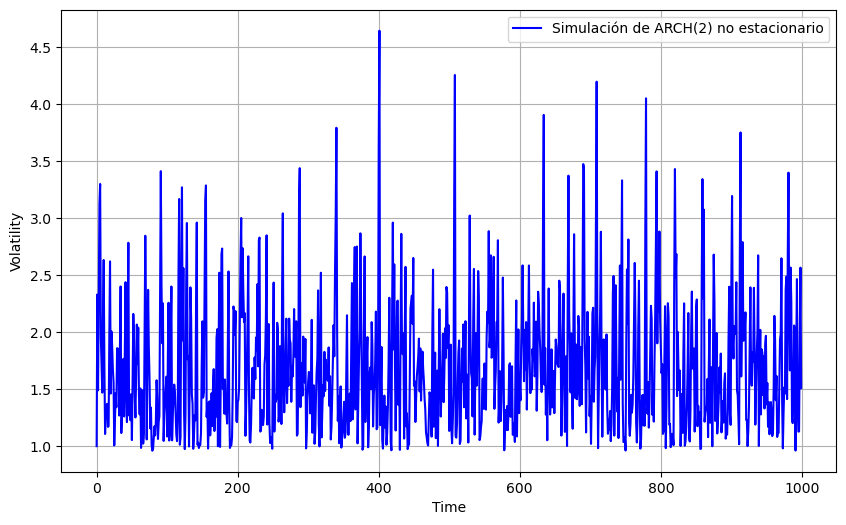

In [ ]:
# Set seed using the numpy module
np.random.seed(1)

# Set the parameters
alpha = [1.6, 0.8]
beta = []

# Simulate a non-stationary GARCH(2, 0) process
simulated_data_non_stationary = simulate_garch(n=1000, p=2, q=0, alpha=alpha, beta=beta, make_stationary=False)

# Plot the simulated non-stationary time series
plt.figure(figsize=(10, 6))
plt.plot(simulated_data_non_stationary, color='blue', label='Simulación de ARCH(2) no estacionario')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Set seed using the numpy module
np.random.seed(2609)

# Simulate GARCH(5, 1) with 500 observations
n_obs = 500
p = 5
q = 1

alpha = np.random.uniform(0, 0.3, p)
beta = np.random.uniform(0, 0.3, q)

simulated_data_garch = simulate_garch(alpha=alpha, beta=beta, n=n_obs)

# Visualize the simulated time series
plt.figure(figsize=(10, 8))
simulated_data_garch.plot(color='blue', title=f'Simulated GARCH({p=}, {q=}) Time Series with Volatility (n={n_obs})')
plt.axhline(y=simulated_data_garch.iloc[0], color='red', linestyle='--', label=f'omega = {simulated_data_garch.iloc[0]:.2f}')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.xlim(max(p, q), n_obs)
plt.legend()
plt.grid(True)
plt.show()

# Simulate AR(1) model with heteroscedasticity using GARCH(p, q) variances
alpha_ar = 0.7
epsilon_ar = np.random.normal(size=n_obs)
simulated_data_ar = np.zeros(n_obs)

for t in range(1, n_obs):
    simulated_data_ar[t] = alpha_ar * simulated_data_ar[t-1] + np.sqrt(simulated_data_garch[t]) * epsilon_ar[t]

# Visualize the simulated AR(1) time series with heteroscedasticity
plt.figure(figsize=(10, 6))
plt.plot(simulated_data_ar, color='green', label=f'Simulated AR(1) with Heteroscedasticity (n={n_obs})')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xlim(max(p, q), n_obs)
plt.legend()
plt.grid(True)
plt.show()

TypeError: simulate_garch() missing 2 required positional arguments: 'p' and 'q'

## Simulaciones para distintos $p,q$ con estacionaridad

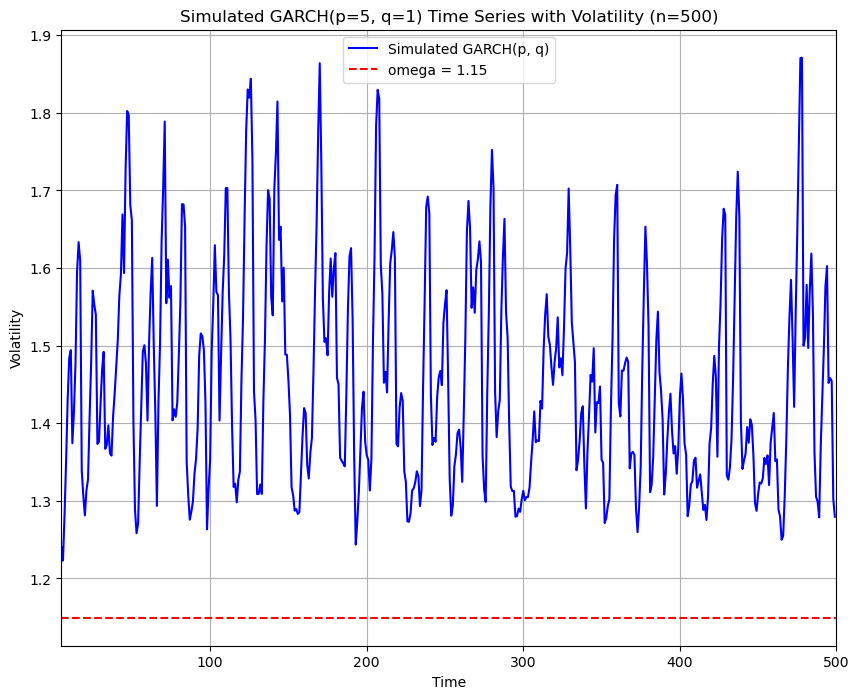

In [ ]:
# Visualize the simulated time series
plt.figure(figsize=(10, 8))
simulated_data_garch.plot(color='blue', title=f'Simulated GARCH({p=}, {q=}) Time Series with Volatility (n={n_obs})')
plt.axhline(y=simulated_data_garch.iloc[0], color='red', linestyle='--', label=f'omega = {simulated_data_garch.iloc[0]:.2f}')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.xlim(max(p, q), n_obs)
plt.legend()
plt.grid(True)
plt.show()

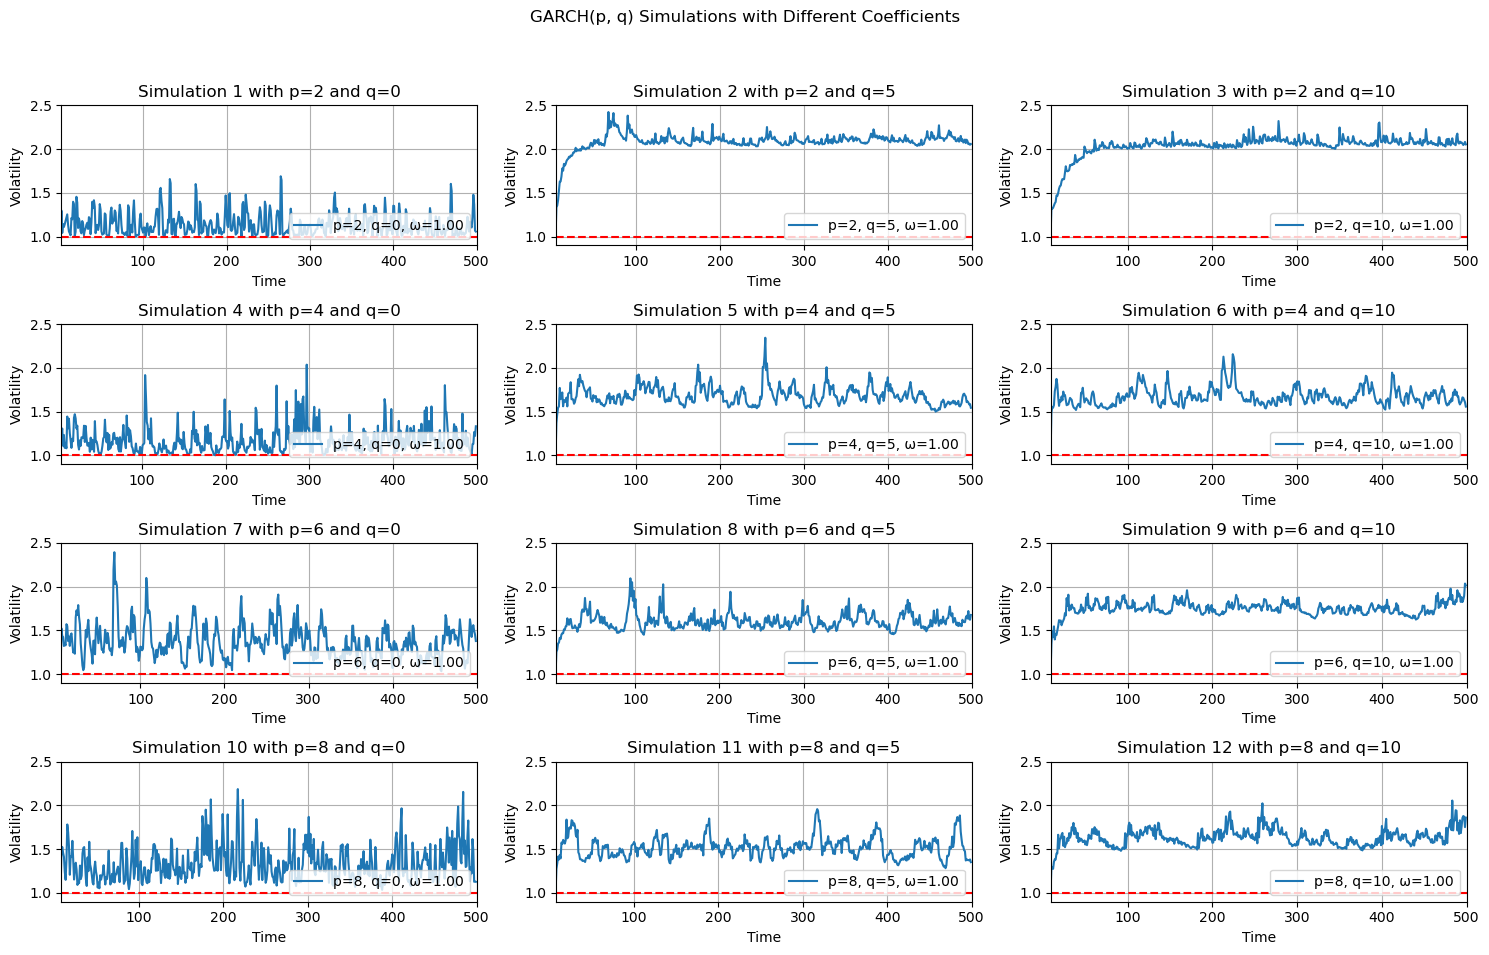

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Your simulate_garch function (unchanged)

# Function to plot multiple simulations in a 3x3 grid
def plot_simulations():
    
    np.random.seed(2609)

    omega = 1
    n_obs = 500

    valores_p = [2, 4, 6, 8]
    valores_q = [0, 5, 10]

    fig, axes = plt.subplots(len(valores_p), len(valores_q), figsize=(15, 10))
    fig.suptitle('GARCH(p, q) Simulations with Different Coefficients')


    for i in range(len(valores_p)):
        for j in range(len(valores_q)):
            p = valores_p[i]
            q = valores_q[j]
            alpha = np.random.uniform(0, 0.3, p)
            beta = np.random.uniform(0, 0.3, q)

            simulated_data = simulate_garch(alpha=alpha, beta=beta, omega=omega, n=n_obs)

            axes[i, j].plot(simulated_data, label=f'{p=}, {q=}, ω={omega:.2f}')
            axes[i, j].legend(loc='lower right')
            axes[i, j].grid(True)
            axes[i, j].set_title(f'Simulation {i*3 + j + 1} with {p=} and {q=}')

            axes[i, j].set_xlabel('Time')
            axes[i, j].set_ylabel('Volatility')
            axes[i, j].set_xlim(max(p, q), n_obs)
            axes[i, j].set_ylim(0.9*omega, 2.5)
            axes[i, j].axhline(y=omega, color='red', linestyle='--', label=f'{omega}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Call the function to plot simulations
plot_simulations()